# AI4PH Assignment

## By Thierry Gagné

## Last update : November 17th, 2023

**Goal:** *The goal of the assignment is to practice some of the tools and best practices you have learnt last week and this week.*

**Task:** *Your task is to select a dataset from [here](https://data.ontario.ca/dataset/?keywords_en=COVID-19) and conduct exploratory data analysis using Jupyter Notebooks. Document your code in comments and in markdown. Make sure your environment is replicable using virtual environments and a requirements file. Make sure your code is kept in version control and commited to a public repository that can be shared, and that you have multiple commits to show progress over time.*

**Suggested Steps**:

* Create a Github repository
* Clone it to your local computer
* Create a README file that provides a link and the name of that dataset you have picked
* Commit this README into your repository and push it to Github
* Create a virtual environment and activate it
* Update your gitignore to make sure the virtual enviornment is not commited into your repository
* Install jupyter notebook in your virtual enviornment and create a notebook where you will do your analysis
* Commit your work so far
* Install pandas.
* Download your dataset and load it using pandas
* Make sure your data is not commited into your repository
* Do some basic data exploration using pandas and include at minimum **one visualization** and the calculation of **two summary statistics**. 
* Explain your findings using markdown
* Freeze your environment dependencies and save it to a requirements.txt file
* Commit everything one last time, and make sure everything is pushed to Github



# Step 1 - Install libraries

I already did this step through the terminal, but you need:
* **requests** to download the dataset,
* **pandas** to analyse the dataset, and
* **matplotlib** to create the plot.


In [3]:
!source venv/bin/activate

import requests
import pandas as pd
import matplotlib.pyplot as plt

# Step 2 - Download the dataset

I chose this dataset: [Ontario COVID-19 testing percent positive by age group](https://data.ontario.ca/dataset/ontario-covid-19-testing-percent-positive-by-age-group/resource/05214a0d-d8d9-4ea4-8d2a-f6e3833ba471)

This dataset shows the 7-day average infection rate of COVID-19 by age group between March 2020 and November 2023 in the province of Ontario. I chose the dataset because it is less than 1 MB: no need to download a 350 MB dataset for an assignment!


In [99]:
# This checks if the dataset is not already downloaded.

import os.path
path = './percent_positive_by_agegrp.csv'
check_file = os.path.isfile(path)
print("Is the database already downloaded?: " + str(check_file) + "\n")

# This downloads the dataset
url = "https://data.ontario.ca/dataset/ab5f4a2b-7219-4dc7-9e4d-aa4036c5bf36/resource/05214a0d-d8d9-4ea4-8d2a-f6e3833ba471/download/percent_positive_by_agegrp.csv"
filename = 'percent_positive_by_agegrp.csv'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers)

with open(filename, mode="wb") as file:
    file.write(response.content)

dataset = pd.read_csv(filename)

print("DESCRIPTION\n")

print("These are the variable names in the dataset:")
for x in dataset.columns:
    print("- ", x)

print()
print("These are the age categories:")
for x in dataset["age_category"].unique():
    print("- ", x)

print()
print("There are ... missing values across variables:")
for x in dataset.columns:
    print("For variable {}: ".format(x), dataset[x].isnull().sum())

print()
print("The dataset has a total of {} entries, i.e., one for each day across the five age group".format(len(dataset)))

Is the database already downloaded?: True

DESCRIPTION

These are the variable names in the dataset:
-  DATE
-  age_category
-  percent_positive_7d_avg

These are the age categories:
-  0to13
-  14to17
-  18to24
-  25to64
-  65+

There are ... missing values across variables:
For variable DATE:  0
For variable age_category:  0
For variable percent_positive_7d_avg:  0

The dataset has a total of 6440 entries, i.e., one for each day across the five age group


# Step 3 - Some basic calculations...

Based on these daily rates, let's calculate the mean and median infection rate per month in all five age groups.


In [100]:

dataset['year'] = pd.DatetimeIndex(dataset['DATE']).year.astype(str)
dataset['month'] = pd.DatetimeIndex(dataset['DATE']).month.astype(str)
dataset['month'] = dataset['month'].apply(lambda x: "0" + x if len(x) == 1 else x)
dataset['monthyear'] = dataset['year'] + '_' + dataset['month']
dataset = dataset.drop(["year", "month"], axis = 1)

mean = dataset.groupby(['age_category', 'monthyear'])['percent_positive_7d_avg'].mean().reset_index()
median = dataset.groupby(['age_category', 'monthyear'])['percent_positive_7d_avg'].median().reset_index()

dataset = pd.merge(dataset, mean, on = ["age_category", "monthyear"])
dataset = pd.merge(dataset, median, on = ["age_category", "monthyear"])

dataset = dataset.rename(columns={"percent_positive_7d_avg_x": "percent_positive_7d_avg", 
    "percent_positive_7d_avg_y": "monthly_mean",
    "percent_positive_7d_avg": "monthly_median"})

dataset.head()

,DATE,age_category,percent_positive_7d_avg,monthyear,monthly_mean,monthly_median
0,2020-05-01,0to13,0.0346,2020_05,0.033713,0.0339
1,2020-05-02,0to13,0.0355,2020_05,0.033713,0.0339
2,2020-05-03,0to13,0.0365,2020_05,0.033713,0.0339
3,2020-05-04,0to13,0.0364,2020_05,0.033713,0.0339
4,2020-05-05,0to13,0.0354,2020_05,0.033713,0.0339


# Step 4 - Some basic plotting...

Now, let's use Matplotlib to plot these monthly rates.

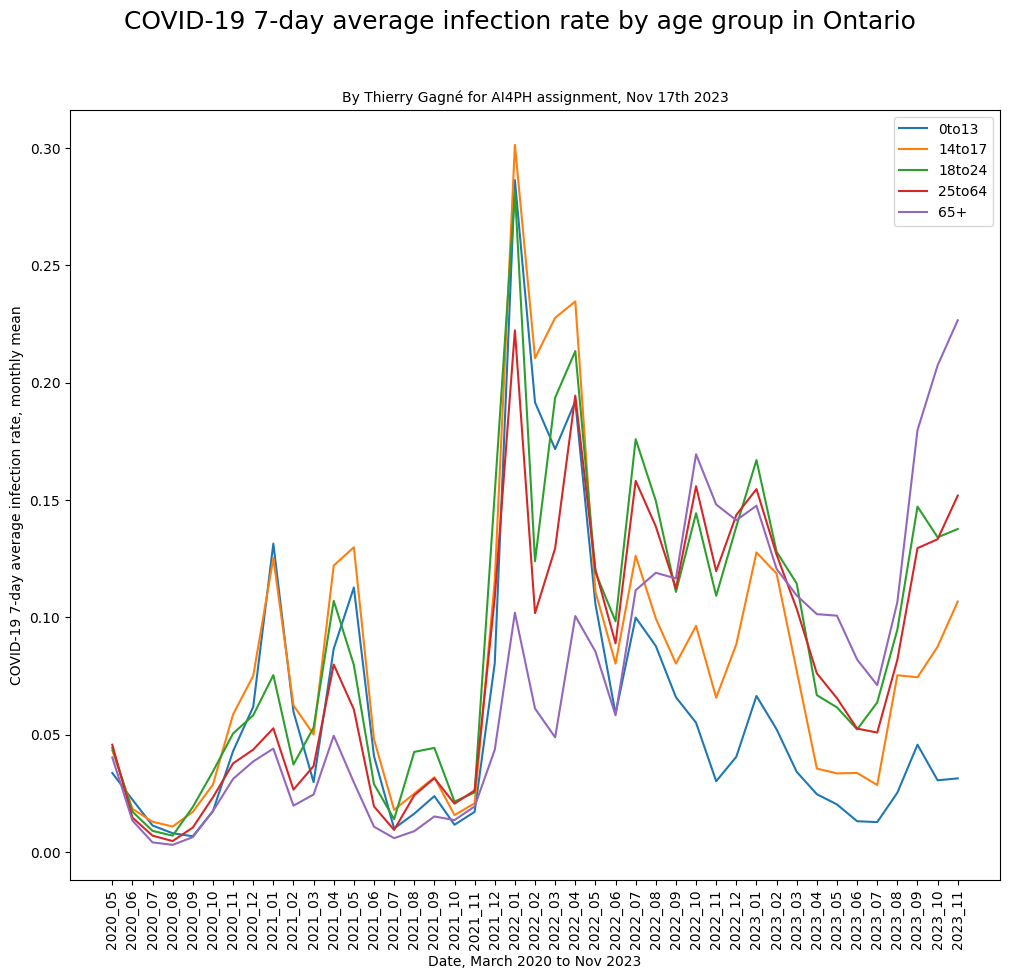

In [101]:
# Monthly means

plt.figure(figsize=(12, 10))
for x in mean["age_category"].unique():
    plt.plot(mean[mean["age_category"] == x]["monthyear"], mean[mean["age_category"] == x]["percent_positive_7d_avg"])
suptitle = "COVID-19 7-day average infection rate by age group in Ontario"
title = "By Thierry Gagné for AI4PH assignment, Nov 17th 2023"
plt.suptitle(suptitle, fontsize=18)
plt.title(title, fontsize=10)
plt.xlabel("Date, March 2020 to Nov 2023")
plt.xticks(rotation=90)
plt.ylabel('COVID-19 7-day average infection rate, monthly mean')
plt.legend(mean["age_category"].unique())
plt.show()


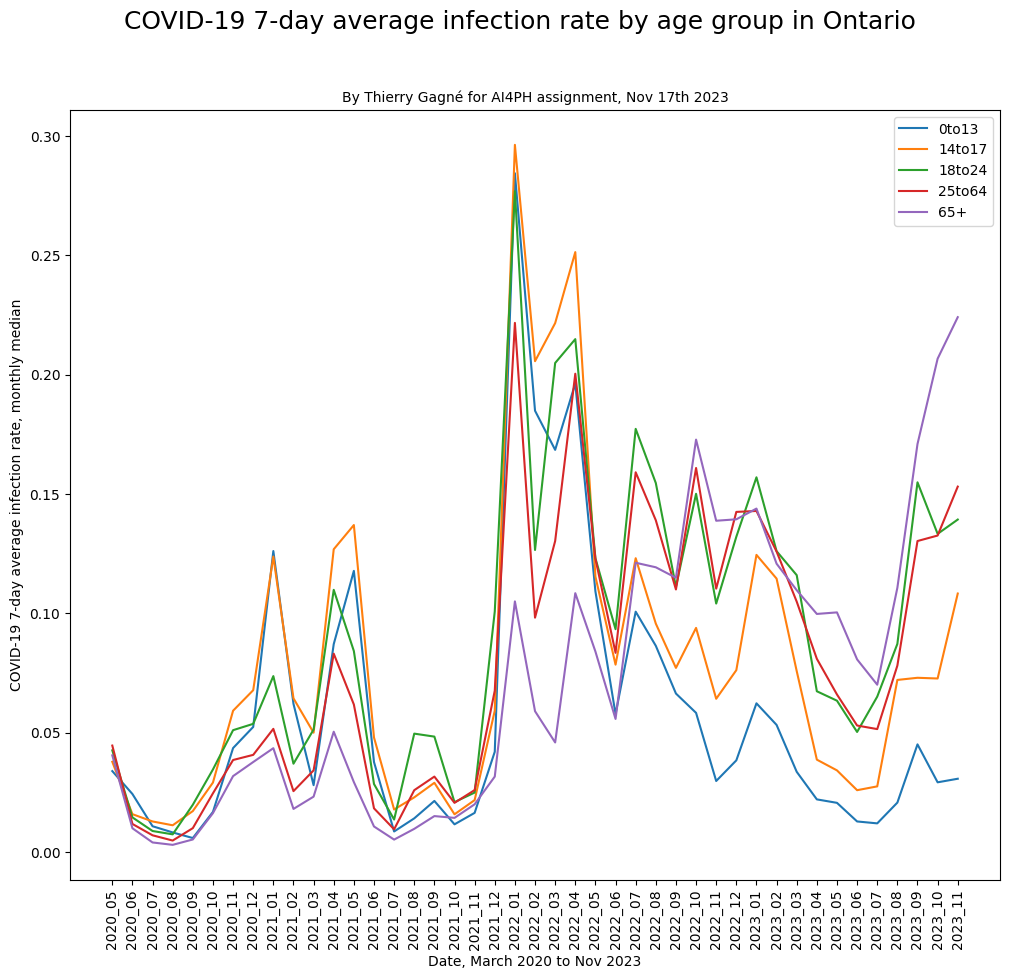

In [102]:
# Monthly median

plt.figure(figsize=(12, 10))
for x in median["age_category"].unique():
    plt.plot(median[median["age_category"] == x]["monthyear"], median[median["age_category"] == x]["percent_positive_7d_avg"])
suptitle = "COVID-19 7-day average infection rate by age group in Ontario"
title = "By Thierry Gagné for AI4PH assignment, Nov 17th 2023"
plt.suptitle(suptitle, fontsize=18)
plt.title(title, fontsize=10)
plt.xlabel("Date, March 2020 to Nov 2023")
plt.xticks(rotation=90)
plt.ylabel('COVID-19 7-day average infection rate, monthly median')
plt.legend(median["age_category"].unique())
plt.show()

# Step 5 - Some basic interpretation...

The graphs show time trends in COVID-19 infection rates across five age groups in the province of Ontario between May 2020 and November 2023.

For instance, the monthly average for the 7-day average infection rate among children aged 0-13 in May 2020 was 0.033713, meaning that approximately 3.4% of that age group had tested positive for COVID-19 during that month.

We can see that COVID-19 infection trends for late 2023 will likely vary substantially from previous years. 

Whereas 2020 and 2021 saw higher rates among children and adolescents (represented by the blue and orange lines) compared with adults aged 65+ (represented by the the purple line), rates since September 2023 are highest in older adults. It is possible that this captures a selection bias, i.e., older adults are now much more likely to test themselves compared to children and adolescents.